filtered_cancer_data.csv
Cancer_best_random_projection_data.csv
Cancer_best_pca_data.csv
Cancer_best_ica_data.csv


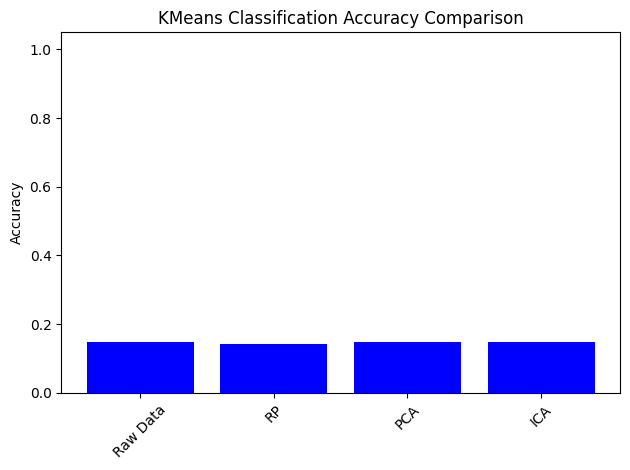

In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import matplotlib.pyplot as plt
import json
from sklearn.preprocessing import LabelEncoder

# Replace with your file paths
datasets = [
    ("Raw Data", "filtered_cancer_data.csv"),
    ("RP", "Cancer_best_random_projection_data.csv"),
    ("PCA", "Cancer_best_pca_data.csv"),
    ("ICA", "Cancer_best_ica_data.csv"),
]

y = pd.read_csv('filtered_cancer_outcome.csv').values.ravel()

le = LabelEncoder()
y_numeric = le.fit_transform(y)

accuracies = []

for name, feature_path in datasets:
    # Load data
    X = pd.read_csv(feature_path).values
    
    
    # Fit KMeans
    kmeans = KMeans(n_clusters=2, n_init=5, max_iter=300, random_state=42)
    clusters = kmeans.fit_predict(X)
    
    # Map each cluster to true labels via majority vote
    labels = np.zeros_like(clusters)
    for i in range(2):
        mask = clusters == i
        labels[mask] = mode(y_numeric[mask], keepdims=True).mode[0]
    
    # Compute accuracy
    acc = accuracy_score(y_numeric, labels)
    accuracies.append((name, acc))


# Convert results to dictionary and dump to JSON
results_dict = {name: acc for name, acc in accuracies}
with open("cancer_kmeans_accuracies.json", "w") as f:
    json.dump(results_dict, f, indent=4)

# Plot
names, scores = zip(*accuracies)
plt.bar(names, scores, color='blue')
plt.ylabel("Accuracy")
plt.title("KMeans Classification Accuracy Comparison")
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Cancer_KMeans_Acc.png", bbox_inches='tight')
plt.show()


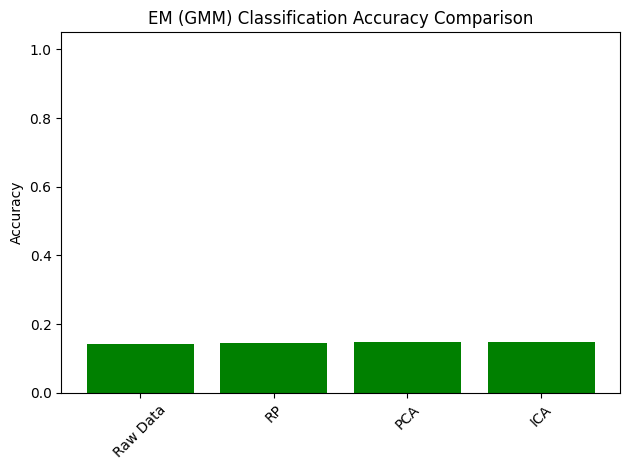

In [13]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


# Dataset paths
datasets = [
    ("Raw Data", "filtered_cancer_data.csv"),
    ("RP", "Cancer_best_random_projection_data.csv"),
    ("PCA", "Cancer_best_pca_data.csv"),
    ("ICA", "Cancer_best_ica_data.csv"),
]

# Load ground truth labels
y = pd.read_csv('filtered_cancer_outcome.csv').values.ravel()

le = LabelEncoder()
y_numeric = le.fit_transform(y)

accuracies = []

for name, feature_path in datasets:
    # Load features
    X = pd.read_csv(feature_path).values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    # Fit GMM (EM algorithm)
    gmm = GaussianMixture(n_components=2, n_init=5, reg_covar=10e-3, max_iter=300, random_state=42)
    clusters = gmm.fit_predict(X)

    # Map cluster labels to actual labels using majority vote
    labels = np.zeros_like(clusters)
    for i in range(2):
        mask = clusters == i
        labels[mask] = mode(y_numeric[mask], keepdims=True).mode[0]

    # Compute accuracy
    acc = accuracy_score(y_numeric, labels)
    accuracies.append((name, acc))


# Convert results to dictionary and dump to JSON
results_dict = {name: acc for name, acc in accuracies}
with open("cancer_EM_accuracies.json", "w") as f:
    json.dump(results_dict, f, indent=4)


# Plotting the results
names, scores = zip(*accuracies)
plt.bar(names, scores, color='green')
plt.ylabel("Accuracy")
plt.title("EM (GMM) Classification Accuracy Comparison")
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("cancer_EM_Acc.png", bbox_inches='tight')

plt.show()
